# AirburstSolver User Guide #

In [4]:
# import
import deepimpact

## Running a simulation : ##
### Step 1: Initialize the Planet Object ###

In [17]:
earth = deepimpact.Planet()

### Step 2: Solve Atmospheric Entry ###

Use the solve_atmospheric_entry method to simulate the meteoroid's atmospheric entry. We need to provide several input parameters:

* Meteoroid radius (m)
* Meteoroid velocity (m/s)
* Meteoroid density (kg/m$^3$)
* Meteoroid strength (Pa)
* Meteoroid trajectory angle (degrees)

In [20]:
result = earth.solve_atmospheric_entry(radius=35, angle=45,
                                       strength=1e7, density=3000,
                                       velocity=19e3)
result

,time,velocity,mass,angle,altitude,distance,radius
0,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000
1,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000
2,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000
3,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000
4,1.25,19008.637025,5.387806e+08,44.877087,83220.405805,16577.252729,35.000000
5,1.50,19010.352507,5.387791e+08,44.852416,79867.911694,19903.043870,35.000000
6,1.75,19012.059639,5.387769e+08,44.827717,76516.567381,23232.289847,35.000000
7,2.00,19013.754466,5.387734e+08,44.802988,73166.377269,26564.993205,35.000000
8,2.25,19015.430979,5.387681e+08,44.778229,69817.346632,29901.155625,35.000000
9,2.50,19017.080054,5.387601e+08,44.753442,66469.482056,33240.777470,35.000000


### Step 3: Calculate Energy ###
Calculate the kinetic energy and energy loss during the atmospheric entry.

In [21]:
result = earth.calculate_energy(result)

result

,time,velocity,mass,angle,altitude,distance,radius,dedz
0,0.25,19001.732017,5.387830e+08,44.975476,96641.808504,3308.569415,35.000000,0.000000
1,0.50,19003.462356,5.387827e+08,44.950922,93284.750349,6620.575462,35.000000,-1.257681
2,0.75,19005.190529,5.387823e+08,44.926340,89928.828462,9936.022131,35.000000,-1.254768
3,1.00,19006.915795,5.387816e+08,44.901728,86574.045879,13254.913311,35.000000,-1.250335
4,1.25,19008.637025,5.387806e+08,44.877087,83220.405805,16577.252729,35.000000,-1.243590
5,1.50,19010.352507,5.387791e+08,44.852416,79867.911694,19903.043870,35.000000,-1.233329
6,1.75,19012.059639,5.387769e+08,44.827717,76516.567381,23232.289847,35.000000,-1.217721
7,2.00,19013.754466,5.387734e+08,44.802988,73166.377269,26564.993205,35.000000,-1.193983
8,2.25,19015.430979,5.387681e+08,44.778229,69817.346632,29901.155625,35.000000,-1.157885
9,2.50,19017.080054,5.387601e+08,44.753442,66469.482056,33240.777470,35.000000,-1.103002


### Step 4: Analyze the Outcome ###
Determine whether the event results in an airburst or a cratering event and analyze other outcome metrics.

In [22]:
outcome = earth.analyse_outcome(result)

outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 2750.4566600817584,
 'burst_altitude': 10671.191492373087,
 'burst_distance': 89594.26631899436,
 'burst_energy': 2750.4566600817584}

## Interactive Simulation: ##

1. Adjust the input parameters using the provided sliders.
2. Click the 'Run Simulation' button to start the simulation.
3. The simulation will process the inputs and display the results in a series of graphs and data tables.

In [23]:
import ipywidgets as widgets

# Creating widgets for each input; change the min/max (etc) parameter when necessary
radius_widget = widgets.FloatSlider(value=10, min=0.1, max=1000, step=0.1, description='Radius (m):')
velocity_widget = widgets.FloatSlider(value=20000, min=11000, max=72000, step=1000, description='Velocity (m/s):')
density_widget = widgets.FloatSlider(value=3000, min=500, max=8000, step=100, description='Density (kg/m^3):')
strength_widget = widgets.FloatSlider(value=1e6, min=1e5, max=1e9, step=1e6, description='Strength (Pa):')
angle_widget = widgets.FloatSlider(value=45, min=0, max=360, step=1, description='Angle (degrees):')
timestep_widget = widgets.FloatSlider(value=0.25, min=0.01, max=1, step=0.01, description='Timestep (s):')

# Display widgets
display(radius_widget, velocity_widget, density_widget, strength_widget, angle_widget, timestep_widget)


FloatSlider(value=10.0, description='Radius (m):', max=1000.0, min=0.1)

FloatSlider(value=20000.0, description='Velocity (m/s):', max=72000.0, min=11000.0, step=1000.0)

FloatSlider(value=3000.0, description='Density (kg/m^3):', max=8000.0, min=500.0, step=100.0)

FloatSlider(value=1000000.0, description='Strength (Pa):', max=1000000000.0, min=100000.0, step=1000000.0)

FloatSlider(value=45.0, description='Angle (degrees):', max=360.0, step=1.0)

FloatSlider(value=0.25, description='Timestep (s):', max=1.0, min=0.01, step=0.01)

In [28]:
import matplotlib.pyplot as plt

# Data visualization
def display_results(result_df, outcome):
    # Display the dataframe and outcome dictionary
    display(result_df)
    display(outcome)

    # Setting up the figure for subplots
    fig, axs = plt.subplots(10, 1, figsize=(10, 20))  # 5 rows, 1 column

    # Plotting each feature in a separate subplot
    axs[0].plot(result_df['altitude'], result_df['mass'], label='Mass', color='blue')
    axs[0].set_title('Mass vs Altitude')
    axs[0].set_xlabel('Altitude (m)')
    axs[0].set_ylabel('Mass (kg)')

    axs[1].plot(result_df['altitude'], result_df['velocity'], label='Velocity', color='green')
    axs[1].set_title('Velocity vs Altitude')
    axs[1].set_xlabel('Altitude (m)')
    axs[1].set_ylabel('Velocity (m/s)')

    axs[2].plot(result_df['altitude'], result_df['angle'], label='Angle', color='red')
    axs[2].set_title('Angle vs Altitude')
    axs[2].set_xlabel('Altitude (m)')
    axs[2].set_ylabel('Angle (degrees)')

    axs[3].plot(result_df['altitude'], result_df['distance'], label='Distance', color='purple')
    axs[3].set_title('Distance vs Altitude')
    axs[3].set_xlabel('Altitude (m)')
    axs[3].set_ylabel('Distance (m)')

    axs[4].plot(result_df['altitude'], result_df['radius'], label='Radius', color='orange')
    axs[4].set_title('Radius vs Altitude')
    axs[4].set_xlabel('Altitude (m)')
    axs[4].set_ylabel('Radius (m)')

    axs[5].plot(result_df['time'], result_df['mass'], label='Mass', color='blue')
    axs[5].set_title('Mass vs Time')
    axs[5].set_xlabel('Time (s)')
    axs[5].set_ylabel('Mass (kg)')

    axs[6].plot(result_df['time'], result_df['velocity'], label='Velocity', color='green')
    axs[6].set_title('Velocity vs Time')
    axs[6].set_xlabel('Time (s)')
    axs[6].set_ylabel('Velocity (m/s)')

    axs[7].plot(result_df['time'], result_df['angle'], label='Angle', color='red')
    axs[7].set_title('Angle vs Time')
    axs[7].set_xlabel('Time (s)')
    axs[7].set_ylabel('Angle (degrees)')

    axs[8].plot(result_df['time'], result_df['distance'], label='Distance', color='purple')
    axs[8].set_title('Distance vs Time')
    axs[8].set_xlabel('Time (s)')
    axs[8].set_ylabel('Distance (m)')

    axs[9].plot(result_df['time'], result_df['radius'], label='Radius', color='orange')
    axs[9].set_title('Radius vs Time')
    axs[9].set_xlabel('Time (s)')
    axs[9].set_ylabel('Radius (m)')

    # Adjusting layout for better visibility
    plt.tight_layout()
    plt.show()



### Clike on the 'Run Simulation' button to display the results: ###

Button(description='Run Simulation', style=ButtonStyle())

,time,velocity,mass,angle,altitude,distance,radius,dedz
0,0.25,20001.726751,1.256635e+07,44.973647,96465.126483,3482.799393,10.000000,0.000000
1,0.50,20003.448797,1.256633e+07,44.947262,92931.576268,6969.405750,10.000000,-0.028906
2,0.75,20005.163968,1.256628e+07,44.920845,89399.353395,10459.823030,10.000000,-0.028595
3,1.00,20006.868894,1.256622e+07,44.894395,85868.462390,13954.054717,10.000000,-0.028112
4,1.25,20008.558335,1.256611e+07,44.867913,82338.908528,17452.103550,10.000000,-0.027361
5,1.50,20010.224153,1.256595e+07,44.841398,78810.698249,20953.971115,10.000000,-0.026193
6,1.75,20011.853706,1.256570e+07,44.814850,75283.839794,24459.657193,10.000000,-0.024376
7,2.00,20013.427357,1.256531e+07,44.788270,71758.344199,27969.158765,10.000000,-0.021553
8,2.25,20014.914611,1.256471e+07,44.761658,68234.226837,31482.468454,10.000000,-0.017164
9,2.50,20016.268118,1.256377e+07,44.735012,64711.509809,34999.572104,10.000000,-0.010344


{'outcome': 'Airburst',
 'burst_peak_dedz': 66.83489036976005,
 'burst_altitude': 26744.311528580853,
 'burst_distance': 73240.54591829004,
 'burst_energy': 66.83489036976005}

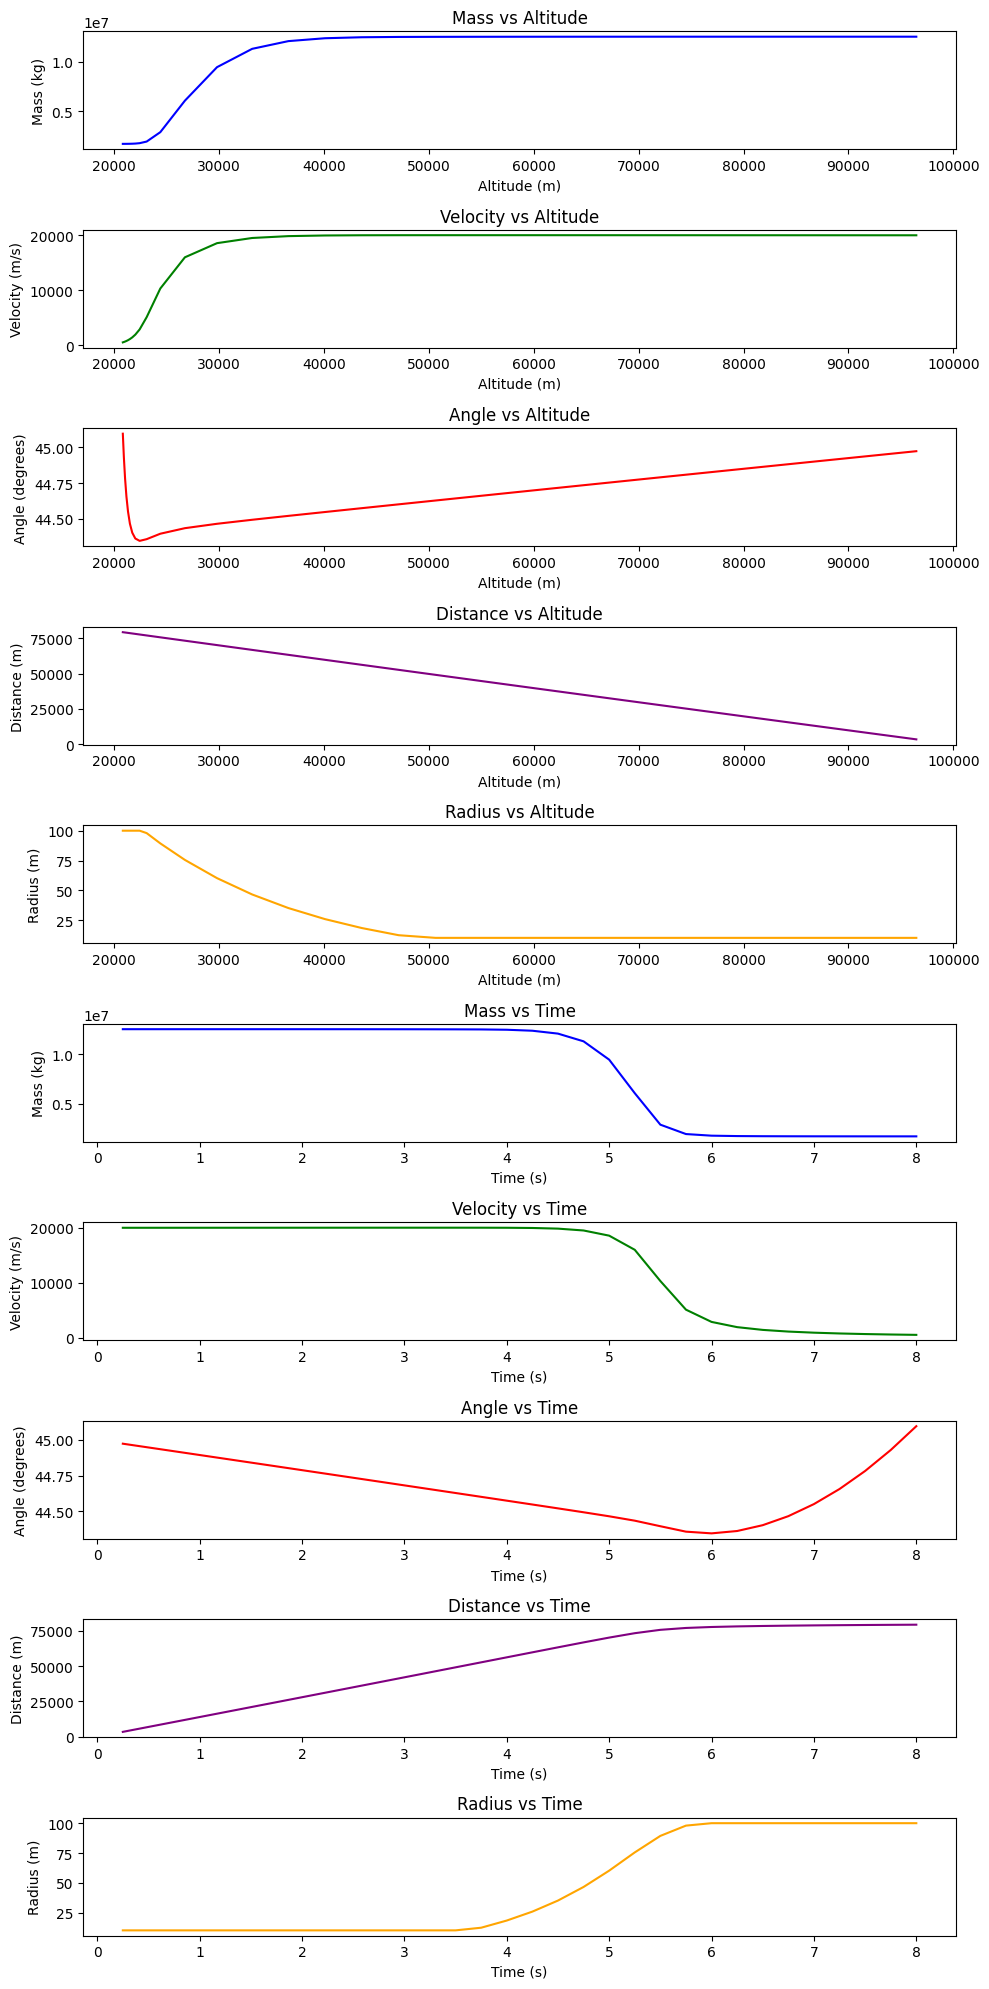

In [29]:
# Function to run on button click
def run_simulation(b):
    earth = deepimpact.Planet()
    # Getting values from widgets
    radius = radius_widget.value
    velocity = velocity_widget.value
    density = density_widget.value
    strength = strength_widget.value
    angle = angle_widget.value
    timestep = timestep_widget.value
    
    # Running the solver
    result_df = earth.solve_atmospheric_entry(radius, velocity, density, strength, angle, dt=timestep)
    result_df = earth.calculate_energy(result_df)
    outcome = earth.analyse_outcome(result_df)
    
    # Display results and plots
    display_results(result_df, outcome)

run_button = widgets.Button(description='Run Simulation')
run_button.on_click(run_simulation)
display(run_button)


### Understanding the Output ###

The output consists of:

* A Pandas dataframe: Shows various parameters like altitude, velocity, mass, etc., at each timestep.
* Graphs/Plots: Visual representations of the meteoroid’s mass, velocity, angle, distance, and radius over altitude (m).